# Audio fingerprints

1. Function compute_spectrogram

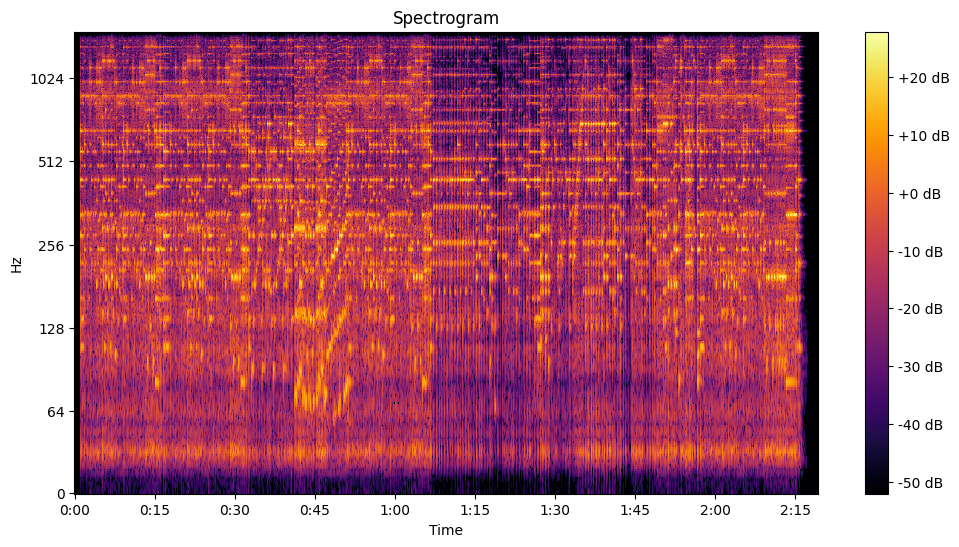

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
def compute_spectrogram(x):
    stft = librosa.stft(x,win_length=1024,n_fft=2048,hop_length=512)
    spectogram = np.abs(stft)**2
    return spectogram

song, fs = librosa.load('../songs/Classicals.de - Bizet, Georges - Carmen Prelude - Arranged for Solo Piano.mp3', sr=3000)

spectrogram = compute_spectrogram(song)
plt.figure(figsize=(12, 6))

hop_length =512
librosa.display.specshow(
    librosa.power_to_db(spectrogram),  
    x_axis='time',
    y_axis='log',
    cmap='inferno',
    hop_length=hop_length,
    sr=fs
)

plt.colorbar(format='%+2.0f dB')  # Muestra la escala en dB
plt.title('Spectrogram')
plt.show()

2. get_maxima()

In [3]:
from utils_projet import get_maxima

maxima = get_maxima(spectrogram)
maxima.shape
print("shape spectrogram " ,spectrogram.shape)
print("shape maxima " ,maxima.shape)


shape spectrogram  (1025, 817)
shape maxima  (1036, 2)


In [ ]:
freq = maxima[0][0]
time = maxima[0][1]
ampl = spectrogram[time][freq]

np.float32(3.8195472)

In [22]:
np.max(maxima[:][1])

np.int64(301)

In [12]:
spectrogram[0][816]

np.float32(0.0)

c:\Users\alfar\OneDrive\Escritorio\IMT\PREMIERE ANNEE\AARES\Projet AARES-20260202\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


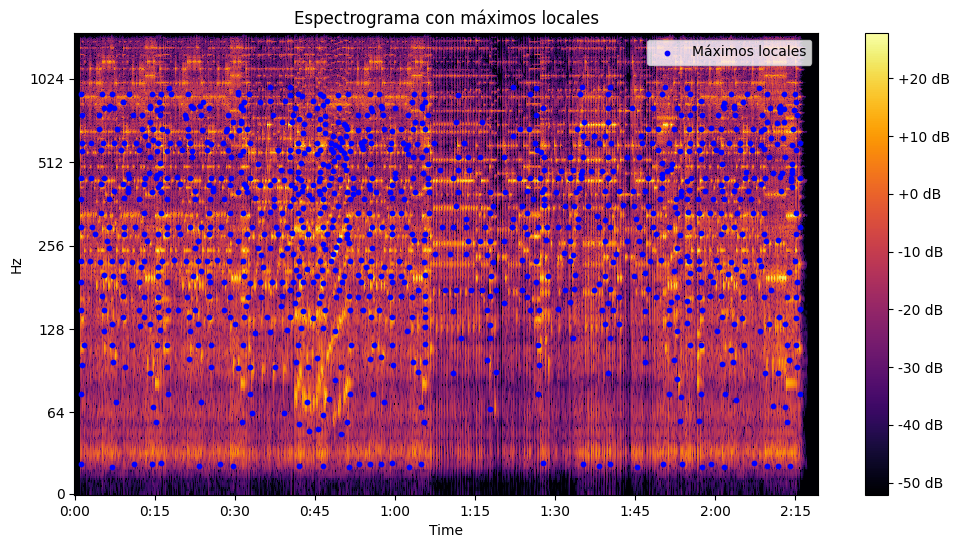

In [ ]:
plt.figure(figsize=(12, 6))


librosa.display.specshow(
    librosa.power_to_db(spectrogram),
    x_axis='time',
    y_axis='log',
    cmap='inferno',
    hop_length=512,
    sr=fs
)


plt.colorbar(format='%+2.0f dB')

plt.scatter(
    x=(maxima[:, 1]* hop_length / fs), 
    y=maxima[:, 0],  
    color='blue',
    s=10,
    marker='o',
    label='Maximums locaux'
)

plt.title('Spectrogramme avec des Maximums locaux')
plt.legend()


plt.show()


3. We will take each maximum as an anchor point and select a small region called Target
Zone not far away from it. 

In [ ]:
def get_maxima_in_tz(S, maxima, anchor):
    time_win = 300
    freq_win = 20
    
    posfreq_anchor = anchor[0] 
    postime_anchor = anchor[1] 
    dist_anch = 1 * fs / hop_length   # La distance entre l'anchor et la target zone
    
    # Window dimensions
    start_win_time = postime_anchor + dist_anch
    end_wid_time = start_win_time + time_win
    start_win_freq = posfreq_anchor - freq_win/2
    end_wid_freq = posfreq_anchor + freq_win/2
    
    max_in_zone = []  
    for val in maxima:
        freq = val[0] 
        time = val[1] 
        
        is_target_zone_freq = freq >= start_win_freq and freq <= end_wid_freq
        is_target_zone_time = time >= start_win_time and time <= end_wid_time 
        
        if is_target_zone_freq and is_target_zone_time:
            ampl = S[freq, time] 
            max_in_zone.append([val, ampl])
            
    
    max_in_zone.sort(key=lambda x: x[1], reverse=True)
    
    return [item[0] for item in max_in_zone[:10]]

In [38]:
get_maxima_in_tz(spectrogram,maxima,maxima[0])

[array([ 22, 272]),
 array([23, 85]),
 array([ 23, 324]),
 array([ 22, 174]),
 array([ 22, 246]),
 array([24, 95]),
 array([ 22, 136]),
 array([ 23, 159]),
 array([ 23, 336]),
 array([ 21, 301])]